In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Analysis of BlackRock Inc (BLK)
Data consists of stock prices for BlackRock Inc (BLK) in the time period 2019-11-11 until 2022-11-10<br>
Datasource: [finance.yahoo.com](https://finance.yahoo.com)

In [52]:
# Read in historical data of BlackRock Inc from Yahoo Finance
blk_df = pd.read_csv('data/BLK.csv')
sp100_df = pd.read_csv('data/OEX.csv')

pd.options.mode.chained_assignment = None #Removes error that otherwise occur in for-loop (default='warn')

# Calculate returns and put into a new column
blk_df['Returns'] = blk_df['Close'].pct_change()
sp100_df['Returns'] = sp100_df['Close'].pct_change()

# Fix so that S&P100 data can be used as index
sp100_df['adjReturn'] = blk_df['Close']
for i in range(1, len(blk_df)):
    sp100_df['adjReturn'][i] = sp100_df['adjReturn'][i-1]*(1+sp100_df['Returns'][i])

Close = Close price adjusted for splits.  
Adj Close = Adjusted close price adjusted for splits and dividend and/or capital gain distributions.

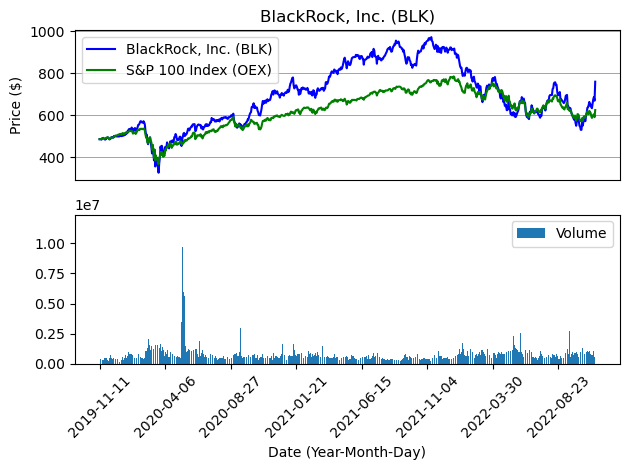

In [53]:
x = sp100_df['Date']
y = sp100_df['adjReturn']

fig, axs = plt.subplots(2)

axs[0].set_title('BlackRock, Inc. (BLK)')
axs[0].set_ylabel('Price ($)')
axs[0].get_xaxis().set_ticks([])
axs[0].plot(blk_df['Date'], blk_df['Close'], color='blue')
axs[0].plot(x, y, color = 'green')
axs[0].grid(color = 'grey', linewidth = 0.5)
axs[0].legend(['BlackRock, Inc. (BLK)', 'S&P 100 Index (OEX)'])
axs[1].set_xlabel('Date (Year-Month-Day)')
axs[1].set_xticks(np.arange(0, len(x)+1, 100))
axs[1].tick_params(axis='x',labelrotation=45)
axs[1].bar(blk_df['Date'],blk_df['Volume'], label='BlackRock')
axs[1].legend(['Volume'])
fig.tight_layout()
plt.show()

For this project I decided to studie the American investment company BlackRock. In the graph above you can see the development of the stock over a three year long time period between 2019-11-11 to 2022-11-10. The return of BLK (blue) is compared to the index S&P100 (green). The bottom graph shows the traded volume over the same period.

# Returns

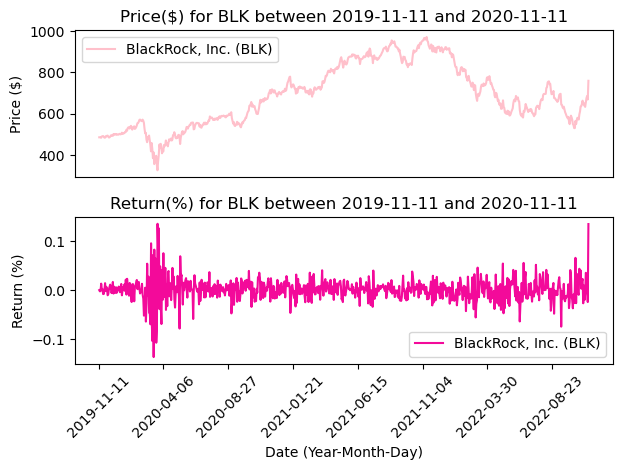

In [29]:
x = blk_df['Date']
y1 = blk_df['Close']
y2 = blk_df['Returns']

fig, axs = plt.subplots(2)
# Remove x-axis ticks
axs[0].set_title('Price($) for BLK between 2019-11-11 and 2020-11-11')
axs[0].set_xticks([])
axs[0].set_xticklabels([])
axs[0].set_ylabel('Price ($)')
axs[0].plot(x, y1, color = 'pink')
axs[0].legend(['BlackRock, Inc. (BLK)'])
axs[1].set_title('Return(%) for BLK between 2019-11-11 and 2020-11-11')
axs[1].tick_params(axis='x', labelrotation = 45)
axs[1].set_xticks(np.arange(0, len(x)+1, 100))
axs[1].set_xlabel('Date (Year-Month-Day)')
axs[1].set_ylabel('Return (%)')
axs[1].plot(x, y2, c='#F30A9A')
axs[1].legend(['BlackRock, Inc. (BLK)'])
fig.tight_layout()
plt.show()

**Describe the process**<br/>
We can see that volatility clusters were periods with large negative return often also contains days with large positive return. This can especielly be shown in the period of the Covid-crash in 2020 were we see returns of both negative and positive ~15%.

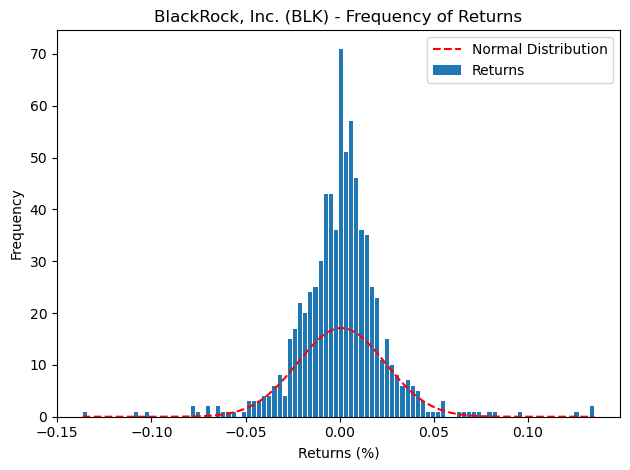

In [30]:
mu = blk_df['Returns'].mean()
sigma = blk_df['Returns'].std()

num_bins = 100

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(blk_df['Returns'], num_bins, rwidth=0.8)

# add a normal distribution line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--', color = 'red')
ax.set_xlabel('Returns (%)')
ax.set_ylabel('Frequency')
ax.legend(['Normal Distribution', 'Returns'])
ax.set_title('BlackRock, Inc. (BLK) - Frequency of Returns')

fig.tight_layout()
plt.show()



**How does this histogram differ from e g a normal distribution?** <br>
Even though the rough features of the histogram seems to follow the bell shaped curve we can see that the returns don't follow the normal distribution when studied in more detail. The most noticable thing here is that as the normal distribution goes towards zero which makes it totally ignore the days with the most fluctuation in price. Ignoring these days can complitely crash your portfolio, especielly if what you buy contains high leverage.  

# 20-day daily volatility window

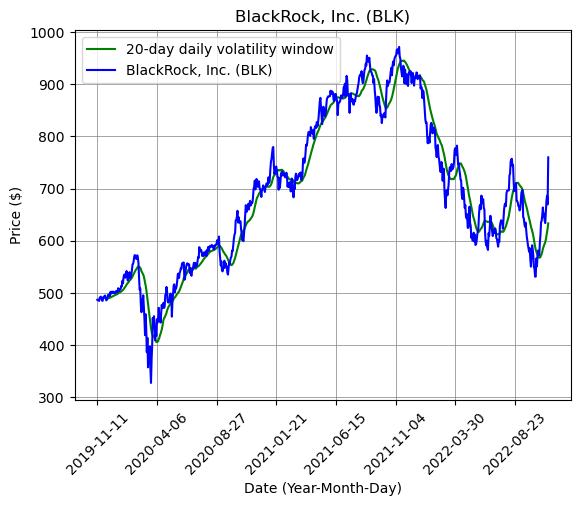

In [31]:
# calculate a 20-day moving average
blk_df['20d'] = np.round(blk_df['Close'].rolling(window=20, center=False).mean(), 2)

plt.plot(blk_df['Date'], blk_df['20d'], color = 'g')
plt.plot(blk_df['Date'], blk_df['Close'], color = 'b')

plt.xticks(np.arange(0, len(x)+1, 100), rotation=45)
plt.title('BlackRock, Inc. (BLK)')
plt.xlabel('Date (Year-Month-Day)')
plt.ylabel('Price ($)')
plt.grid(color = 'grey', linewidth = 0.5)
plt.legend(['20-day daily volatility window','BlackRock, Inc. (BLK)'])
plt.show()

# Returns divided by volatility estimates for each day